In [ ]:
#the dataset
#https://www.kaggle.com/ruthgn/wine-quality-data-set-red-white-wine

In [2]:
#install kydavra because it will be useful later
!pip install kydavra

     |████████████████████████████████| 51 kB 437 kB/s 
     |████████████████████████████████| 675 kB 37.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
#import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#import the dataset
dataset = pd.read_csv("wine-quality-white-and-red.csv")
dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
#look for nan values
dataset.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#we have no nan values
#Yay!

In [7]:
#look at the types of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [89]:
#all the columns have a numeric data type, except for the 'type' column
#there are no incorrect data types

In [8]:
#analyze the numeric columns of the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
#extract the columns' names to use them into the next cells of code
#we're not going to use the 'type' column since it is not numeric
columns = dataset.columns.drop('type')
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
#print the median for every column
for i in columns:
  print("The median for the {} column is ".format(i), dataset[i].median())

The median for the fixed acidity column is  7.0
The median for the volatile acidity column is  0.29
The median for the citric acid column is  0.31
The median for the residual sugar column is  3.0
The median for the chlorides column is  0.047
The median for the free sulfur dioxide column is  29.0
The median for the total sulfur dioxide column is  118.0
The median for the density column is  0.9948899999999999
The median for the pH column is  3.21
The median for the sulphates column is  0.51
The median for the alcohol column is  10.3
The median for the quality column is  6.0


In [11]:
#print the variance in every column
import statistics
for i in columns:
  print("The variance in the {} column is ".format(i), statistics.variance(dataset[i]))

The variance in the fixed acidity column is  1.6807404883629504
The variance in the volatile acidity column is  0.027105168599035098
The variance in the citric acid column is  0.021117281858394666
The variance in the residual sugar column is  22.636696458307586
The variance in the chlorides column is  0.0012273532251243658
The variance in the free sulfur dioxide column is  315.04119226636243
The variance in the total sulfur dioxide column is  3194.720038677381
The variance in the density column is  8.992039783233375e-06
The variance in the pH column is  0.02585252436042857
The variance in the sulphates column is  0.022143188022171658
The variance in the alcohol column is  1.4225613158901027
The variance in the quality column is  0.7625747692568984


In [12]:
#count the number of values into the 'type' column
dataset.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

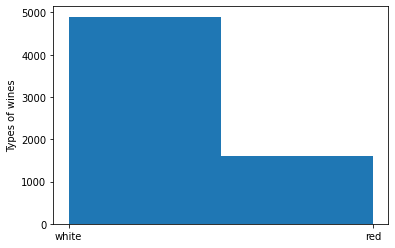

In [13]:
#plot the 'type' column histogram
%matplotlib inline
plt.hist(dataset['type'], bins=2)
plt.ylabel('Types of wines');

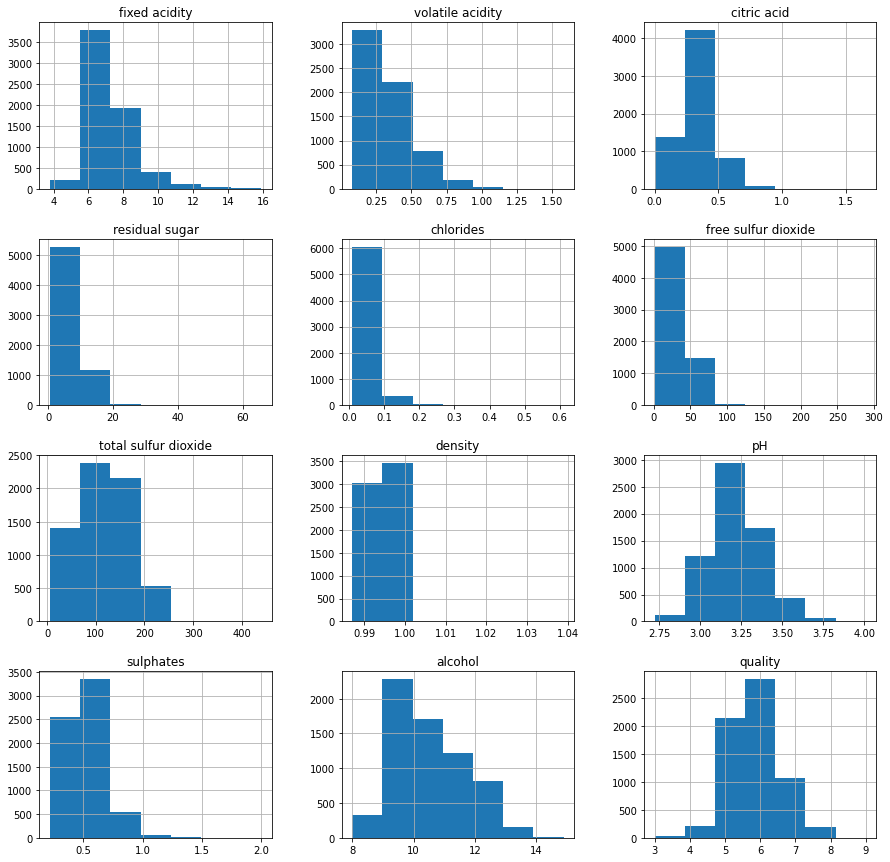

In [14]:
#plot the histograms for the whole dataset
dataset.hist(bins=7, figsize=(15, 15))
plt.show()

In [ ]:
#according to the 'type' histogram, the data is unbalanced

In [ ]:
#let's check columns correlation to the type column

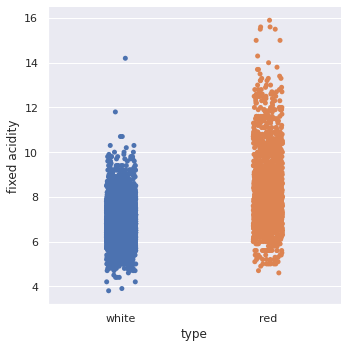

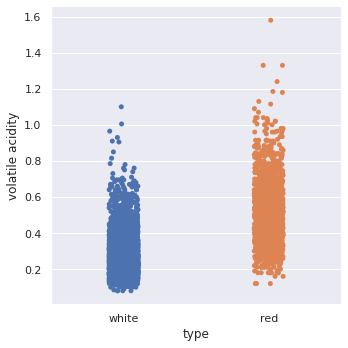

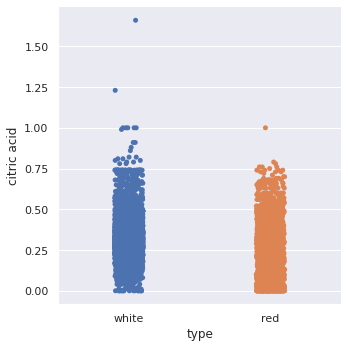

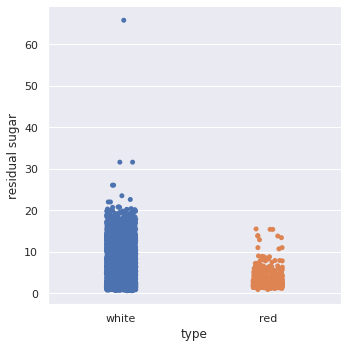

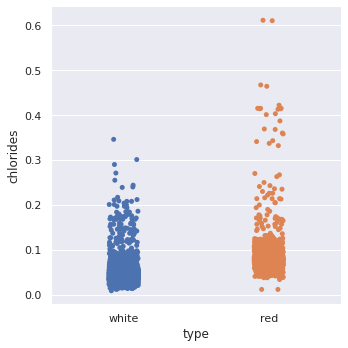

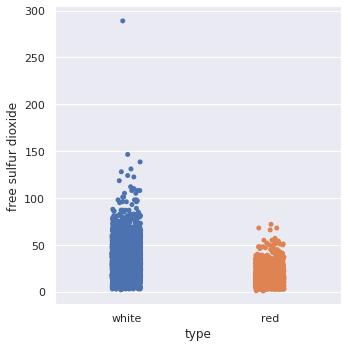

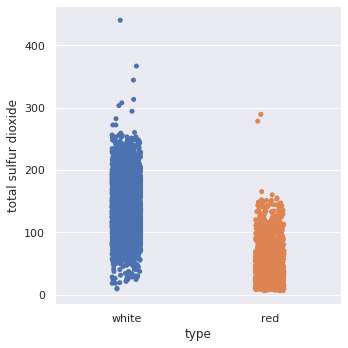

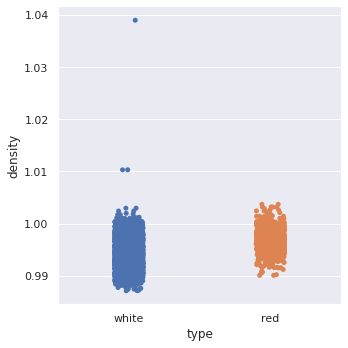

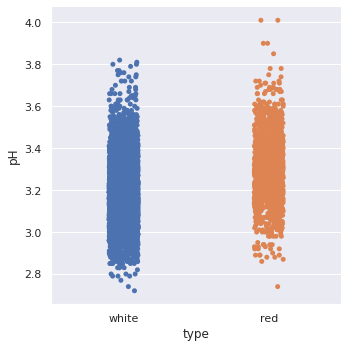

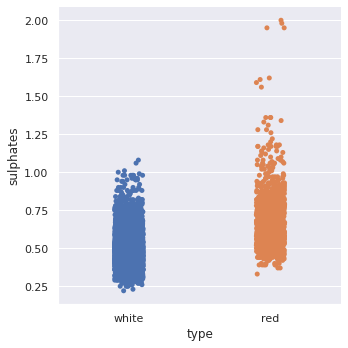

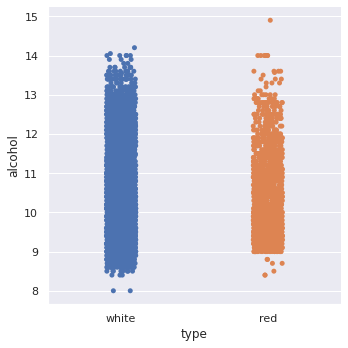

In [15]:
sns.set()
for n, feat in enumerate(columns):
        if feat != 'quality':
          sns.catplot(x="type", y=feat, hue="type", data=dataset)

In [ ]:
#The fixed acidity, volatiale acidity, residual sugar, 
#chlorides, free sulfur dioxide, total sulfur dioxide, 
#density, ph, sulphates and alcohol columns might be informative.

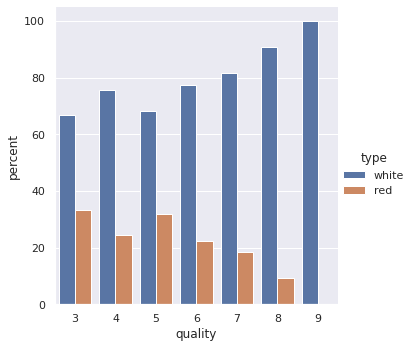

In [16]:
#check the correlation between quality and the type of wines
(dataset
.groupby('quality')['type']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='quality',y='percent',hue='type',kind='bar'))

In [ ]:
#the quality column might be a good indicator since the white wines tend to have higher quality and the red wines tend
#to have lower quality, but at the same time, we cannot compare the percentage of the white wines 
#to the percentage of the red wines as we should keep in mind that our data is unbalanced

In [ ]:
#The 'type' column reffers mostly to the color of wine.
#According to wikipedia, the color depends on the presence of acids in the wine.
#That's why we might want to consider the citric acid column as well.

In [17]:
#print the correlation between the columns
print(dataset.corr())

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000          0.219008  ... -0.095452 -0.076743
volatile acidity           0.219008          1.000000  ... -0.037640 -0.265699
citric acid                0.324436         -0.377981  ... -0.010493  0.085532
residual sugar            -0.111981         -0.196011  ... -0.359415 -0.036980
chlorides                  0.298195          0.377124  ... -0.256916 -0.200666
free sulfur dioxide       -0.282735         -0.352557  ... -0.179838  0.055463
total sulfur dioxide      -0.329054         -0.414476  ... -0.265740 -0.041385
density                    0.458910          0.271296  ... -0.686745 -0.305858
pH                        -0.252700          0.261454  ...  0.121248  0.019506
sulphates                  0.299568          0.225984  ... -0.003029  0.038485
alcohol                   -0.095452         -0.037640  ...  1.000000  0.444319
quality                   -0.076743         -0.26569

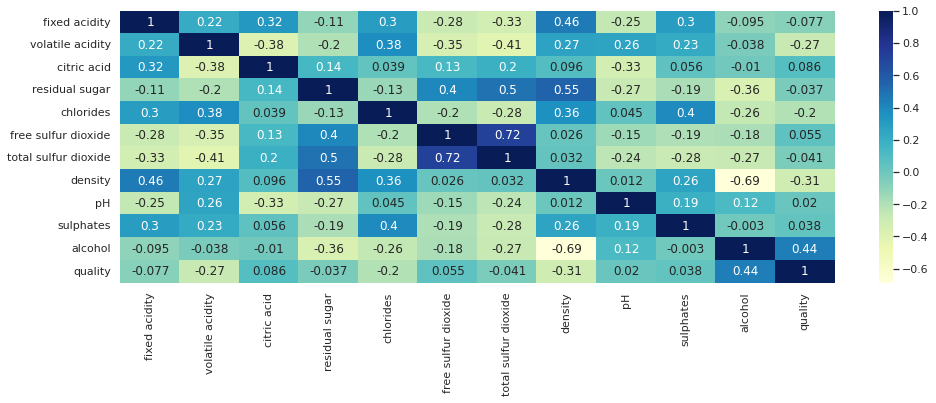

In [18]:
#let's use the heatmap for a better interpretation
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [19]:
#we can see that some columns tend to have a high collinearity between them, which means that here we might have
#multicollinearity and we should get rid of it

In [20]:
#encode the dependent variable since the next reducer allows only numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['type'] = le.fit_transform(dataset['type'])

In [21]:
import kydavra
from kydavra import LDAReducer
ldar = LDAReducer()
new_dataset = ldar.reduce(dataset, 'type')

In [22]:
new_dataset

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,quality,alcohol_density_residual sugar
0,1,7.0,0.270,0.36,0.045,45.0,170.0,3.00,0.45,6,1
1,1,6.3,0.300,0.34,0.049,14.0,132.0,3.30,0.49,6,1
2,1,8.1,0.280,0.40,0.050,30.0,97.0,3.26,0.44,6,1
3,1,7.2,0.230,0.32,0.058,47.0,186.0,3.19,0.40,6,1
4,1,7.2,0.230,0.32,0.058,47.0,186.0,3.19,0.40,6,1
...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,0.090,32.0,44.0,3.45,0.58,5,0
6493,0,5.9,0.550,0.10,0.062,39.0,51.0,3.52,0.76,6,0
6494,0,6.3,0.510,0.13,0.076,29.0,40.0,3.42,0.75,6,0
6495,0,5.9,0.645,0.12,0.075,32.0,44.0,3.57,0.71,5,0


In [ ]:
#we have reduced our dataset from 13 columns to 11 columns. Yay!

In [25]:
#print the correlation between the columns, including the "type" column, which was avoided earlier
print(new_dataset.corr())

                                    type  ...  alcohol_density_residual sugar
type                            1.000000  ...                        0.930531
fixed acidity                  -0.486740  ...                       -0.520709
volatile acidity               -0.653036  ...                       -0.613691
citric acid                     0.187397  ...                        0.135498
chlorides                      -0.512678  ...                       -0.496247
free sulfur dioxide             0.471644  ...                        0.461506
total sulfur dioxide            0.700357  ...                        0.653704
pH                             -0.329129  ...                       -0.326048
sulphates                      -0.487218  ...                       -0.493828
quality                         0.119323  ...                        0.125749
alcohol_density_residual sugar  0.930531  ...                        1.000000

[11 rows x 11 columns]


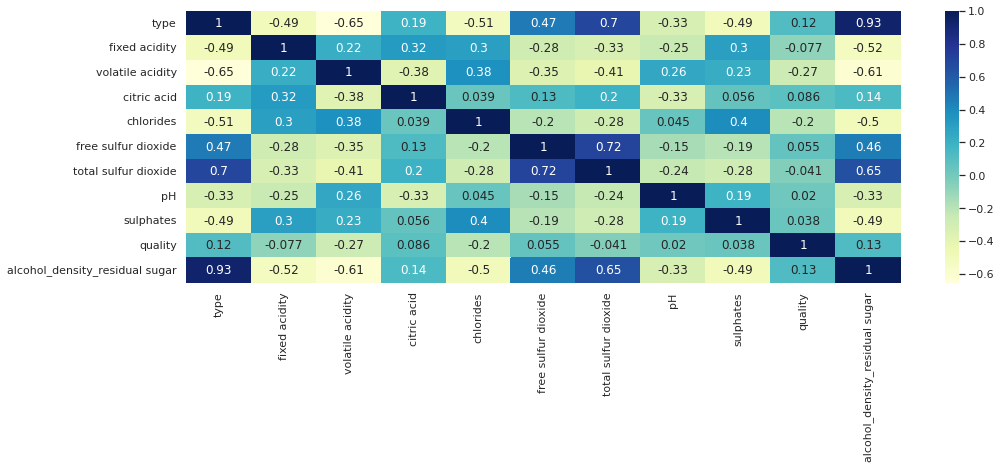

In [26]:
#let's use the heatmap for a better interpretation
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(new_dataset.corr(), cmap="YlGnBu", annot=True)

In [28]:
from kydavra import ANOVASelector
anova = ANOVASelector(significance_level = 0.01)
selected_cols = anova.select(new_dataset, 'type')

In [29]:
selected_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'quality',
 'alcohol_density_residual sugar']

In [ ]:
#ANOVASelector returned all the columns
#Maybe we'll want to consider another selector

In [30]:
from kydavra import PointBiserialCorrSelector
selector = PointBiserialCorrSelector()
new_columns = selector.select(new_dataset, 'type')

In [31]:
new_columns

['alcohol_density_residual sugar', 'total sulfur dioxide']

In [ ]:
#PointBiserialCorrSelector returned only 2 columns
#Since we can see on the heatmap that they have the highest correlation with the "type" column,
#we are going to use only them